In [1]:
from __future__ import print_function
import numpy as np 
import time
#import plaidml.keras 
#plaidml.keras.install_backend()
#import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as Ks
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers as opt
from keras import utils as ut
from keras.preprocessing import image

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

Using TensorFlow backend.


In [2]:
model = Sequential()

from keras.layers import Dense

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


with open("./data/fer2013/fer2013.csv") as f:
    content = f.readlines()
    lines = np.array(content)
    num_of_instances = lines.size
    print("number of instances: ",num_of_instances)


x_train, y_train, x_test, y_test = [], [], [], []
for i in range(1,35888):
    try:
        emotion, img, usage = lines[i].split(",")

        val = img.split(" ")
        pixels = np.array(val, 'float32')
        emotion = ut.to_categorical(emotion, 7)
       
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("", end="")

model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(7, activation='softmax'))

x_train=np.array(x_train)

number of instances:  35888
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
x_train.shape

(28709, 2304)

In [10]:
y_train

[array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
 array([[ 0.,

In [11]:
y_test

[array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.]]),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.]]),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,

In [12]:
x_train =x_train.reshape(-1,48,48,1)

In [29]:
gen = ImageDataGenerator()


In [43]:
train_generator = gen.flow(x_train, y_train,batch_size=500)
 

In [44]:
model.compile(loss='categorical_crossentropy', optimizer= opt.Adam(), metrics=['accuracy'])
 
model.fit_generator(train_generator ,steps_per_epoch=100, epochs=5)


Epoch 1/5
100/100 [==============================] - 194s 2s/step - loss: 13.4104 - acc: 0.1680
Epoch 2/5
 72/100 [====================>.........] - ETA: 55s - loss: 13.3961 - acc: 0.1689

KeyboardInterrupt: 

Populating the interactive namespace from numpy and matplotlib


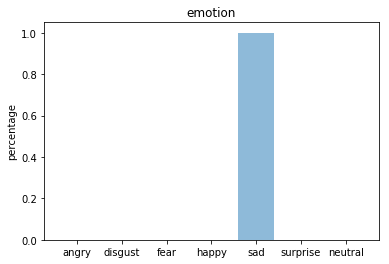

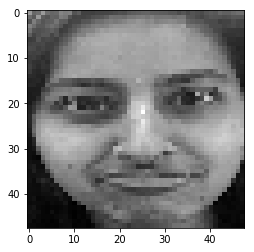

In [42]:
import matplotlib.pyplot as plt
%pylab inline
img = image.load_img("/Users/karthik/Downloads/IMG_8798.JPG", grayscale=True, target_size=(48, 48))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model.predict(x)
emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

In [1]:
x_train

NameError: name 'x_train' is not defined

In [41]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()


In [26]:
model_json = model.to_json()
with open("model_junk.json", "w") as json_file:
    json_file.write(model_json)

In [27]:
model.save_weights("model_junk.h5")
print("Saved model to disk")

Saved model to disk
